In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%load_ext autoreload
%autoreload 2

In [25]:
from legacyzpts.qa.paper_plots import ZeropointHistograms, myscatter
from legacyzpts.qa.params import band2color,col2plotname

In [26]:
dr= "/Users/kaylan1/PhdStudent/Research/desi/publications/observing_paper/data"
z= ZeropointHistograms(decam=os.path.join(dr,"decam_zpts_b4errmessage_bootstrap10k.fits"),
                       mosaic=os.path.join(dr,"mosaic_zpts_bootstrap10k.fits"))

Converted image_filename from |S65 to <U65
Converted camera from |S7 to <U7
Converted ccdname from |S4 to <U4
Converted expid from |S16 to <U16
Converted object from |S35 to <U35
Converted propid from |S10 to <U10
Converted filter from |S1 to <U1
Converted date_obs from |S10 to <U10
Converted ut from |S15 to <U15
Converted ha from |S13 to <U13
Converted err_message from |S30 to <U30
Converted image_filename from |S100 to <U100
Converted camera from |S7 to <U7
Converted ccdname from |S4 to <U4
Converted expid from |S16 to <U16
Converted object from |S35 to <U35
Converted propid from |S10 to <U10
Converted filter from |S1 to <U1
Converted date_obs from |S10 to <U10
Converted ut from |S15 to <U15
Converted ha from |S13 to <U13
cleaning decam
Cutting finite to 9792/10000
cleaning mosaic
Cutting err_message to 9942/10000


/Users/kaylan1/PhdStudent/Research/desi/legacyzpts/py/legacyzpts/qa/paper_plots.py:348: RuntimeWarning: invalid value encountered in true_divide
  T.set('err_on_phoff',1.253 * T.phrms/np.sqrt(nmatch)) # error on median
/Users/kaylan1/PhdStudent/Research/desi/legacyzpts/py/legacyzpts/qa/paper_plots.py:263: RuntimeWarning: invalid value encountered in true_divide
  err_raoff= 1.253 * rarms / np.sqrt(nmatch)
/Users/kaylan1/PhdStudent/Research/desi/legacyzpts/py/legacyzpts/qa/paper_plots.py:264: RuntimeWarning: invalid value encountered in true_divide
  err_decoff= 1.253 * decrms / np.sqrt(nmatch)


wrote rms_2panel_raoff_decoff.png


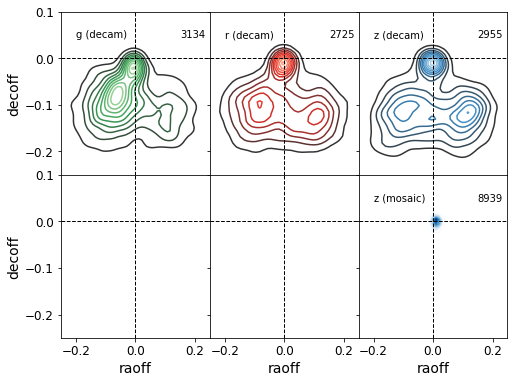

In [56]:
fig,ax= plt.subplots(2,3,figsize=(8,6))
plt.subplots_adjust(hspace=0,wspace=0)
# decam
x_key,y_key= 'raoff','decoff'
if z.decam:
    x,y= z.decam.get(x_key), z.decam.get(y_key)
    for band,cmap,row in zip('grz',['Greens_d','Reds_d','Blues_d'],
                             [0,1,2]): #set(z.decam.filter):
        keep= z.decam.filter == band
        sns.kdeplot(x[keep], y[keep], ax=ax[0,row],
                    cmap=cmap, shade=False, shade_lowest=False)
        ax[0,row].text(-0.2,0.05,'%s (decam)' % band, 
                       horizontalalignment='left',verticalalignment='center')
        ax[0,row].text(0.15,0.05,'%d' % z.num_exp['decam_'+band], 
                       horizontalalignment='left',verticalalignment='center')
                       #transform=ax[1,row].transAxes)
if z.mosaic:
    x,y= z.mosaic.get(x_key), z.mosaic.get(y_key)
    for band,cmap,row in zip('z',['Blues'],
                             [2]): 
        keep= z.mosaic.filter == band
        sns.kdeplot(x[keep], y[keep], ax=ax[1,row],
                    cmap=cmap, shade=False)
        ax[1,row].text(-0.2,0.05,'%s (mosaic)' % band, 
                       horizontalalignment='left',verticalalignment='center')
        ax[1,row].text(0.15,0.05,'%d' % z.num_exp['mosaic_'+band], 
                       horizontalalignment='left',verticalalignment='center')
                       #transform=ax[1,row].transAxes)
# Crosshairs
for row in range(2):
    for col in range(3):
        ax[row,col].axhline(0,c='k',ls='dashed',lw=1)
        ax[row,col].axvline(0,c='k',ls='dashed',lw=1)
        if z.get_lim(x_key):
            ax[row,col].set_xlim(z.get_lim(x_key))
        if z.get_lim(y_key):
            ax[row,col].set_ylim(z.get_lim(y_key))
# Label
for col in range(3):
    xlab=ax[1,col].set_xlabel(col2plotname(x_key)) #0.45'' galaxy
    #ax[1,col].tick_params(axis='both')
for row in range(2):
    ylab=ax[row,0].set_ylabel(col2plotname(y_key))
    #ax[row,0].tick_params(axis='both')

for row in range(2):
    for col in [1,2]:
        ax[row,col].yaxis.set_ticklabels([])

savefn='rms_2panel_%s_%s.png' % (x_key,y_key)
plt.savefig(savefn, bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)
print("wrote %s" % savefn)


In [57]:
z.decam.mjd_obs

array([ 57449.30584768,  56915.28517292,  57287.17989815, ...,
        57109.01297531,  57019.30282674,  56452.0198508 ])

In [65]:
isort

array([1560, 8450, 8471, ..., 7108,  429, 2599])

(26, 27)

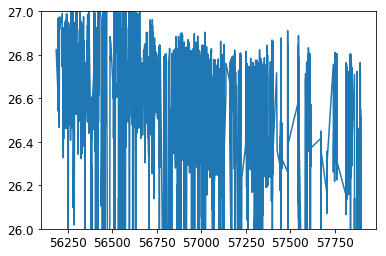

In [67]:
isort= np.argsort(z.decam.mjd_obs)
keep= z.decam.zpt[isort] > 20
plt.plot(z.decam.mjd_obs[isort][keep],z.decam.zpt[isort][keep])
plt.ylim(26,27)

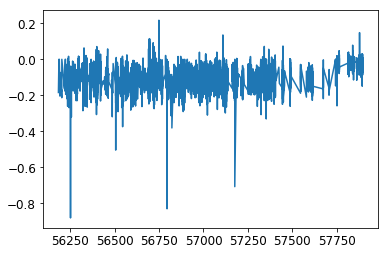

In [68]:
isort= np.argsort(z.decam.mjd_obs)
keep= np.ones(len(z.decam),dtype=bool)
plt.plot(z.decam.mjd_obs[isort][keep],z.decam.decoff[isort][keep])
# plt.ylim(26,27)

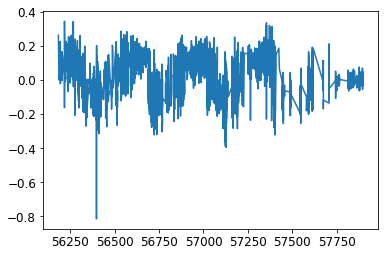

In [69]:
isort= np.argsort(z.decam.mjd_obs)
keep= np.ones(len(z.decam),dtype=bool)
plt.plot(z.decam.mjd_obs[isort][keep],z.decam.raoff[isort][keep])
# plt.ylim(26,27)